# Tutorial 6

### Market Basket Analysis

In [12]:
dataset = [['Milk', 'Eggs', 'Bread'],
['Milk', 'Eggs'],
['Milk', 'Bread'],
['Eggs', 'Apple']]

In [13]:
print(dataset)

[['Milk', 'Eggs', 'Bread'], ['Milk', 'Eggs'], ['Milk', 'Bread'], ['Eggs', 'Apple']]


In [14]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_array, columns=te.columns_)

In [15]:
print(df)

   Apple  Bread   Eggs   Milk
0  False   True   True   True
1  False  False   True   True
2  False   True  False   True
3   True  False   True  False


In [8]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(groceries).transform(groceries)
df = pd.DataFrame(te_array, columns=te.columns_)

In [16]:

from mlxtend.frequent_patterns import apriori

frequent_itemsets_ap = apriori(df, min_support=0.01, use_colnames=True)

In [10]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets_ap = apriori(df, min_support=0.01, use_colnames=True)

In [17]:
print(frequent_itemsets_ap)

   support             itemsets
0     0.25              (Apple)
1     0.50              (Bread)
2     0.75               (Eggs)
3     0.75               (Milk)
4     0.25        (Apple, Eggs)
5     0.25        (Eggs, Bread)
6     0.50        (Bread, Milk)
7     0.50         (Eggs, Milk)
8     0.25  (Eggs, Bread, Milk)


In [18]:
from mlxtend.frequent_patterns import fpgrowth
frequent_itemsets_fp=fpgrowth(df, min_support=0.01, use_colnames=True)

In [19]:
print(frequent_itemsets_fp)

   support             itemsets
0     0.75               (Milk)
1     0.75               (Eggs)
2     0.50              (Bread)
3     0.25              (Apple)
4     0.50         (Eggs, Milk)
5     0.50        (Bread, Milk)
6     0.25        (Eggs, Bread)
7     0.25  (Eggs, Bread, Milk)
8     0.25        (Apple, Eggs)


In [20]:
from mlxtend.frequent_patterns import association_rules

rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.8)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)

In [21]:
print(rules_ap)

     antecedents consequents  antecedent support  consequent support  support  \
0        (Apple)      (Eggs)                0.25                0.75     0.25   
1        (Bread)      (Milk)                0.50                0.75     0.50   
2  (Eggs, Bread)      (Milk)                0.25                0.75     0.25   

   confidence      lift  leverage  conviction  
0         1.0  1.333333    0.0625         inf  
1         1.0  1.333333    0.1250         inf  
2         1.0  1.333333    0.0625         inf  


In [22]:
print(rules_fp)

     antecedents consequents  antecedent support  consequent support  support  \
0        (Bread)      (Milk)                0.50                0.75     0.50   
1  (Eggs, Bread)      (Milk)                0.25                0.75     0.25   
2        (Apple)      (Eggs)                0.25                0.75     0.25   

   confidence      lift  leverage  conviction  
0         1.0  1.333333    0.1250         inf  
1         1.0  1.333333    0.0625         inf  
2         1.0  1.333333    0.0625         inf  


In [23]:
from mlxtend.frequent_patterns import association_rules

rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.8)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)

In [24]:
print(rules_ap)

     antecedents consequents  antecedent support  consequent support  support  \
0        (Apple)      (Eggs)                0.25                0.75     0.25   
1        (Bread)      (Milk)                0.50                0.75     0.50   
2  (Eggs, Bread)      (Milk)                0.25                0.75     0.25   

   confidence      lift  leverage  conviction  
0         1.0  1.333333    0.0625         inf  
1         1.0  1.333333    0.1250         inf  
2         1.0  1.333333    0.0625         inf  


In [25]:
print(rules_fp)

     antecedents consequents  antecedent support  consequent support  support  \
0        (Bread)      (Milk)                0.50                0.75     0.50   
1  (Eggs, Bread)      (Milk)                0.25                0.75     0.25   
2        (Apple)      (Eggs)                0.25                0.75     0.25   

   confidence      lift  leverage  conviction  
0         1.0  1.333333    0.1250         inf  
1         1.0  1.333333    0.0625         inf  
2         1.0  1.333333    0.0625         inf  


# Prepare Data

In [27]:
!pip install jupyterthemes

     |████████████████████████████████| 7.0 MB 8.1 MB/s eta 0:00:01     |██████████████████████████▋     | 5.8 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 5.1 MB/s eta 0:00:01


In [28]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='onedork', context='talk', fscale=1.8, spines=False, gridlines='--', ticks=True, grid=False, figsize=(12, 8))
from os.path import join
import pandas as pd
from matplotlib.ticker import FuncFormatter

## Load Transaction Data

In [29]:
baskets = pd.read_csv('groceries.csv', header=None)
baskets.iloc[:10, :10]

,0,1,2,3,4,5,6,7,8,9
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN
5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN
6,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,NaN
8,potted plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,whole milk,cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
baskets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9835 non-null   object
 1   1       7676 non-null   object
 2   2       6033 non-null   object
 3   3       4734 non-null   object
 4   4       3729 non-null   object
 5   5       2874 non-null   object
 6   6       2229 non-null   object
 7   7       1684 non-null   object
 8   8       1246 non-null   object
 9   9       896 non-null    object
 10  10      650 non-null    object
 11  11      468 non-null    object
 12  12      351 non-null    object
 13  13      273 non-null    object
 14  14      196 non-null    object
 15  15      141 non-null    object
 16  16      95 non-null     object
 17  17      66 non-null     object
 18  18      52 non-null     object
 19  19      38 non-null     object
 20  20      29 non-null     object
 21  21      18 non-null     object
 22  22      14 non-null     

# Plot Basket Size Breakdown

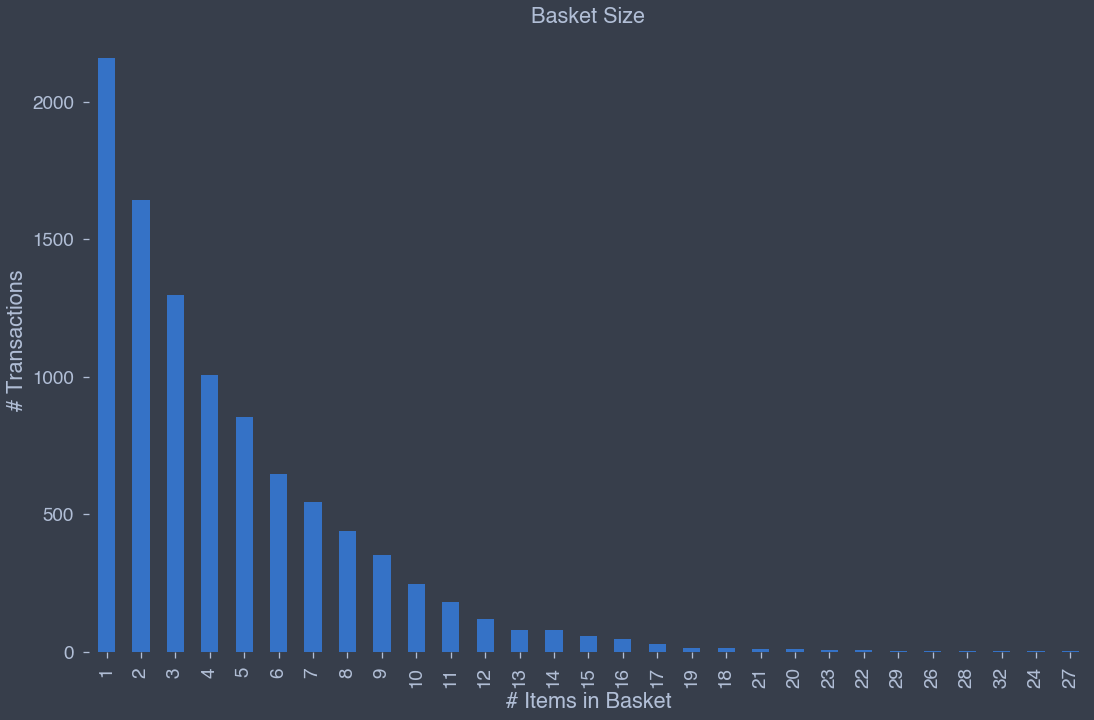

In [31]:
baskets.count(axis=1).value_counts().plot.bar(title='Basket Size')
plt.xlabel('# Items in Basket')
plt.ylabel('# Transactions')
plt.tight_layout();

# Reshape data to create transaction-product matrix

In [32]:
baskets_stacked = baskets.stack()
baskets_stacked.index.names = ['tx_id', 'basket_id']
baskets_stacked.head()

tx_id  basket_id
0      0                   citrus fruit
       1            semi-finished bread
       2                      margarine
       3                    ready soups
1      0                 tropical fruit
dtype: object

# Explore Item Frequencies

In [33]:
baskets_stacked.value_counts().head()

whole milk          2513
other vegetables    1903
rolls/buns          1809
soda                1715
yogurt              1372
dtype: int64

In [34]:
baskets_stacked.value_counts().tail()

kitchen utensil          4
bags                     4
preservation products    2
baby food                1
sound storage medium     1
dtype: int64

In [35]:
baskets_stacked.nunique()

169

# Finalize Transaction-Product Matri

In [36]:
items = pd.get_dummies(baskets_stacked, prefix='', prefix_sep='')
items.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 43367 entries, (0, 0) to (9834, 4)
Columns: 169 entries, Instant food products to zwieback
dtypes: uint8(169)
memory usage: 7.1 MB


In [37]:
items.head()

Instant food products  UHT-milk  abrasive cleaner  \
tx_id basket_id                                                      
0     0                              0         0                 0   
      1                              0         0                 0   
      2                              0         0                 0   
      3                              0         0                 0   
1     0                              0         0                 0   

                 artif. sweetener  baby cosmetics  baby food  bags  \
tx_id basket_id                                                      
0     0                         0               0          0     0   
      1                         0               0          0     0   
      2                         0               0          0     0   
      3                         0               0          0     0   
1     0                         0               0          0     0   

                 baking powder  bathroom cleaner  beef  ...  turkey  vinegar  \
tx_id basket_id                                         ...                    
0     0                      0                 0     0  ...       0        0   
      1                      0                 0     0  ...       0        0   
      2                      0                 0     0  ...       0        0   
      3                      0                 0     0  ...       0        0   
1     0                      0                 0     0  ...       0        0   

                 waffles  whipped/sour cream  whisky  white bread  white wine  \
tx_id basket_id                                                                 
0     0                0                   0       0            0           0   
      1                0                   0       0            0           0   
      2                0                   0       0            0           0   
      3                0                   0       0            0           0   
1     0                0                   0       0            0           0   

                 whole milk  yogurt  zwieback  
tx_id basket_id                                
0     0                   0       0         0  
      1                   0       0         0  
      2                   0       0         0  
      3                   0       0         0  
1     0                   0       0         0  

[5 rows x 169 columns]

# Sum indicator variables by transaction

In [38]:

items = items.groupby(level='tx_id').sum()
items.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
tx_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Create function from data transform steps


In [39]:
def get_transaction_data():
    """Load groceries transaction data into DataFrame"""
    df = pd.read_csv('grocery_transactions.csv')
    df = df.stack().reset_index(-1, drop=True)
    df.index.names = ['tx_id']
    df = pd.get_dummies(df, prefix='', prefix_sep='')
    return df.groupby(level='tx_id').sum()

# Explore Item Support

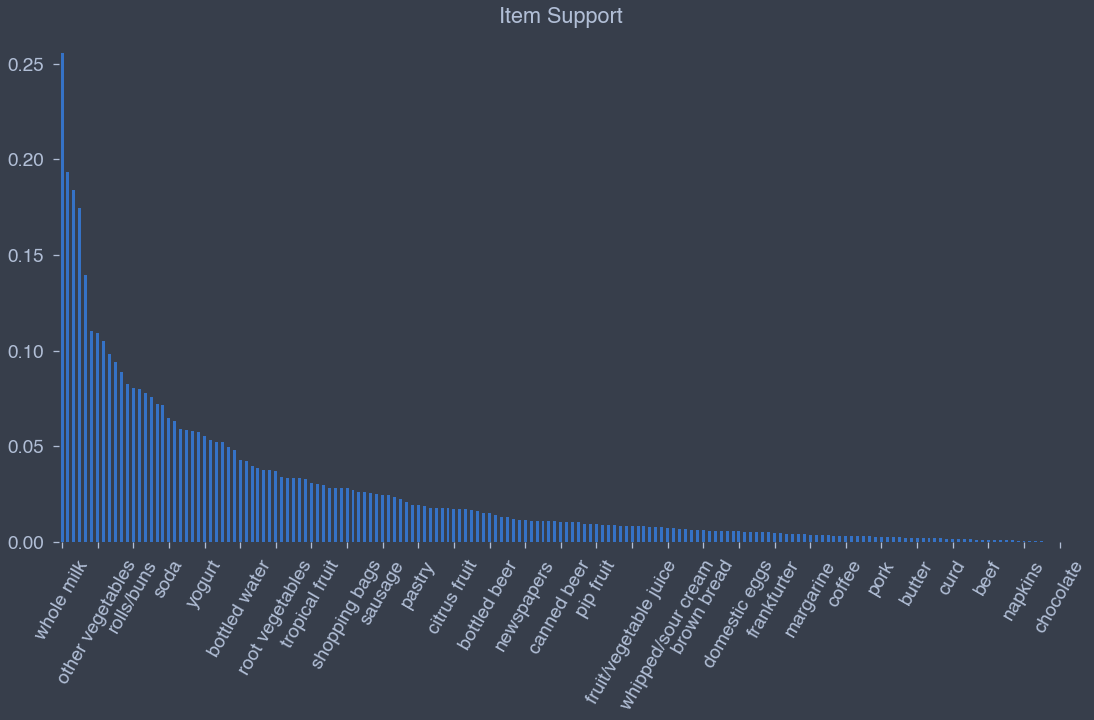

In [40]:
support = items.sum().div(len(items)).sort_values(ascending=False)
ax = support.plot.bar(title='Item Support')
ax.locator_params(nbins=30, axis='x')
plt.xticks(rotation=60)
plt.tight_layout();

# Display Transaction-Product Matrix

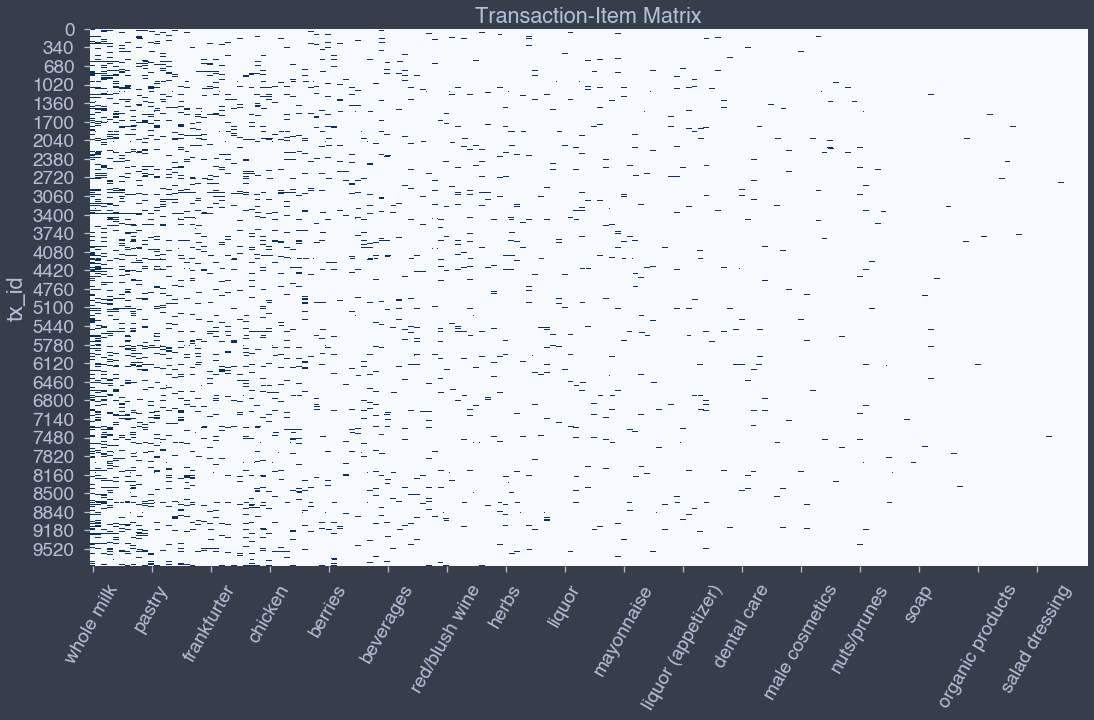

In [41]:
sns.heatmap(items.loc[:, support.index], cbar=False, cmap='Blues', xticklabels=10)
plt.gca().set_title('Transaction-Item Matrix')
plt.xticks(rotation=60)
plt.tight_layout();

# Association Rules

In [42]:
import pandas as pd
import numpy as np
from itertools import combinations
from time import time
from scipy.stats import fisher_exact
from jupyterthemes import jtplot
jtplot.style(theme='onedork', context='talk', fscale=1.8, spines=False, gridlines='--', ticks=True, grid=False, figsize=(12, 8))
import warnings
warnings.filterwarnings('ignore')

# Load the data & build the product-transaction matrix

In [43]:
def get_transaction_data():
    """Load groceries transaction data into DataFrame"""
    df = pd.read_csv('groceries.csv')
    df = df.stack().reset_index(-1, drop=True)
    df.index.names = ['tx_id']
    return pd.get_dummies(df, prefix='', prefix_sep='').groupby(level='tx_id').sum()

In [44]:
data = get_transaction_data()

item_id = pd.Series(dict(enumerate(data.columns)))
transactions = data.values
n_txn = transactions.shape[0]
min_support = 0.01

item_length = 1
candidates = list(zip(item_id.index))
itemsets = pd.DataFrame(columns=['support', 'length'])

new_rules = []
rule_data = ['itemset', 'antecedent', 'consequent',
             'support_rule', 'support_antecedent', 'support_consequent',
             'confidence', 'lift', 'pvalue']
rules = pd.DataFrame(columns=rule_data)

In [45]:
item_id

0      Instant food products
1                   UHT-milk
2           abrasive cleaner
3           artif. sweetener
4             baby cosmetics
               ...          
164              white bread
165               white wine
166               whole milk
167                   yogurt
168                 zwieback
Length: 169, dtype: object

In [46]:
def prune_candidates(all_txn, candidates, candidate_size, min_support):
    """Return DataFrame with itemsets of candidate_size with min_support
        all_txn: numpy array of transaction-product matrix
        candidates: list of tuples containing product id
        candidate_size: length of item set
        min_support: support threshold
        """
    itemsets = {}
    for candidate in candidates:
        candidate_txn = all_txn[:, candidate].reshape(-1, candidate_size)
        relevant_txn = candidate_txn[(candidate_txn == 1).all(axis=1)]
        support = relevant_txn.shape[0] / all_txn.shape[0]
        if support >= min_support:
            itemsets[frozenset(candidate)] = support
    return pd.Series(itemsets).to_frame('support').assign(length=candidate_size)

# Algorithm for Association rules

In [48]:
def find_association_rules(itemsets, n_txn, n_items, min_confidence = 0, min_lift = 0, min_pvalue = 0):
    """Find rules {antecedent} => {consequent} with min_confidence, min_lift and min_pvalue
    itemsets: DataFrame containing all itemsets and their support
    min_confidence, min_lift, min_pvalue: confidence & lift & pvalue thresholds
    """
    support = itemsets.loc[:, 'support'].to_dict()
    new_rules = []
    for itemset in itemsets.loc[itemsets.length == n_items].index:
        for n_antecedents in range(1, n_items):
            antecedents = [frozenset(a)
                           for a in combinations(itemset, r=n_antecedents)]
            for antecedent in antecedents:
                consequent = itemset.difference(antecedent)
                sAC = support[itemset]
                sA, sC = support[antecedent], support[consequent]
                confidence = sAC / sA
                lift = sAC / (sA * sC)
                contingency_table = n_txn * np.array([[sAC, sA - sAC],
                                        [sC - sAC, 1 - sA - sC + sAC]])
                _, p_value = fisher_exact(contingency_table,
                                          alternative='greater')

                if (confidence >= min_confidence) and (lift >= min_lift) and (p_value >= min_pvalue):
                    new_rule = [itemset, antecedent, consequent,
                                support[itemset], support[antecedent], support[consequent],
                                confidence, lift, p_value]
                    new_rules.append(new_rule)
    return new_rules

In [49]:
while candidates:
    new_items = prune_candidates(transactions, candidates, item_length, min_support)
    itemsets = itemsets.append(new_items)

    if item_length > 1:
        new_rules = find_association_rules(itemsets, n_txn, item_length)
        rules = pd.concat([rules, pd.DataFrame(new_rules, columns=rules.columns)], ignore_index=True)
        
    print('Itemset Length {}\tCandidates: {:>7,.0f}\tNew Items: {:>7,.0f}\tNew Rules: {:>7,.0f}'.format(
            item_length, len(candidates), len(new_items), len(new_rules)))
    
    item_length += 1
    remaining_items = np.unique([item for t in new_items.index for item in t])
    candidates = list(combinations(remaining_items, r=item_length))

rules = rules.apply(pd.to_numeric, errors='ignore')

Itemset Length 1	Candidates:     169	New Items:      88	New Rules:       0
Itemset Length 2	Candidates:   3,828	New Items:     213	New Rules:     426
Itemset Length 3	Candidates:  16,215	New Items:      32	New Rules:     192
Itemset Length 4	Candidates:   3,060	New Items:       0	New Rules:       0


In [50]:
rules.info()
rules.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   itemset             618 non-null    object 
 1   antecedent          618 non-null    object 
 2   consequent          618 non-null    object 
 3   support_rule        618 non-null    float64
 4   support_antecedent  618 non-null    float64
 5   support_consequent  618 non-null    float64
 6   confidence          618 non-null    float64
 7   lift                618 non-null    float64
 8   pvalue              618 non-null    float64
dtypes: float64(6), object(3)
memory usage: 43.6+ KB


,itemset,antecedent,consequent,support_rule,support_antecedent,support_consequent,confidence,lift,pvalue
0,"(9, 103)",(9),(103),0.019727,0.052471,0.193512,0.375969,1.942869,2.229585e-23
1,"(9, 103)",(103),(9),0.019727,0.193512,0.052471,0.101944,1.942869,2.229585e-23
2,"(9, 123)",(9),(123),0.013626,0.052471,0.183954,0.259690,1.411714,7.615064e-06
3,"(9, 123)",(123),(9),0.013626,0.183954,0.052471,0.074074,1.411714,7.655712e-06
4,"(9, 124)",(9),(124),0.017389,0.052471,0.109010,0.331395,3.040058,7.774255e-45


# Apriori algorithm

In [51]:
import pandas as pd
import numpy as np
from itertools import combinations
from time import time
from jupyterthemes import jtplot
jtplot.style(theme='onedork', context='talk', fscale=1.8, spines=False, gridlines='--', ticks=True, grid=False, figsize=(12, 8))

# Load the data & build the product-transaction matrix

In [52]:
def get_transaction_data():
    """Load groceries transaction data into DataFrame"""
    df = pd.read_csv('groceries.csv')
    df = df.stack().reset_index(-1, drop=True)
    df.index.names = ['tx_id']
    df = pd.get_dummies(df, prefix='', prefix_sep='')
    return df.groupby(level='tx_id').sum()

# Create itemset candidates

In [53]:
data = get_transaction_data()

item_id = pd.Series(dict(enumerate(data.columns)))
print(item_id.head())
transactions = data.values
print(transactions.shape)

min_support = 0.01
item_length = 1
candidates = list(zip(item_id.index))
candidates_tested = 0
itemsets = pd.DataFrame(columns=['support', 'length'])

0    Instant food products
1                 UHT-milk
2         abrasive cleaner
3         artif. sweetener
4           baby cosmetics
dtype: object
(9834, 169)


In [54]:
candidates[:10]

[(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,)]

# Candidate Generation

In [55]:
for i in range(1, 5):
    remaining_items = np.unique([item for t in candidates for item in t])
    new_candidates = list(combinations(remaining_items, r=i))
    print('Length {}: {:>10,.0f}'.format(i, len(new_candidates)), 
          new_candidates[:5])

Length 1:        169 [(0,), (1,), (2,), (3,), (4,)]
Length 2:     14,196 [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
Length 3:    790,244 [(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 1, 6)]
Length 4: 32,795,126 [(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 2, 5), (0, 1, 2, 6), (0, 1, 2, 7)]


# The apriori pruning based on support

In [56]:
def prune_candidates(all_txn, candidates, candidate_size, min_support):
    """Return DataFrame with itemsets of candidate_size with min_support
        all_txn: numpy array of transaction-product matrix
        candidates: list of tuples containing product id
        candidate_size: length of item set
        min_support: support threshold
        """
    itemsets = {}
    for candidate in candidates:
        candidate_txn = all_txn[:, candidate].reshape(-1, candidate_size)  
        relevant_txn = candidate_txn[(candidate_txn == 1).all(axis=1)]
        candidate_support = relevant_txn.shape[0] / all_txn.shape[0]
        if candidate_support >= min_support:
            itemsets[frozenset(candidate)] = candidate_support
    result = pd.Series(itemsets).to_frame('support')
    return result.assign(length=candidate_size) 

# Running the apriori algorithm


In [57]:
while candidates:
    new_items = prune_candidates(
        transactions, candidates, item_length, min_support)
    itemsets = itemsets.append(new_items)
    candidates_tested += len(candidates)
    print('Itemset Length {}\tCandidates: {:>7,.0f}\tNew Items: {:>7,.0f}'
          .format(item_length, len(candidates), len(new_items)))
    item_length += 1
    remaining_items = np.unique([item for t in new_items.index for item in t])
    candidates = list(combinations(remaining_items, r=item_length))
print('\nPotential Itemsets: {:,.0f} \nTested Itemsets: {:,.0f}'.format(
    2**len(item_id) - 1, candidates_tested))

Itemset Length 1	Candidates:     169	New Items:      88
Itemset Length 2	Candidates:   3,828	New Items:     213
Itemset Length 3	Candidates:  16,215	New Items:      32
Itemset Length 4	Candidates:   3,060	New Items:       0

Potential Itemsets: 748,288,838,313,422,294,120,286,634,350,736,906,063,837,462,003,712 
Tested Itemsets: 23,272


In [58]:
itemsets.info()
itemsets.sort_values('support', ascending=False).head()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, frozenset({1}) to frozenset({162, 166, 167})
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   support  333 non-null    float64
 1   length   333 non-null    object 
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


,support,length
(166),0.255542,1
(103),0.193512,1
(123),0.183954,1
(139),0.174395,1
(167),0.139516,1


In [59]:
itemsets.length.value_counts().sort_index()

1     88
2    213
3     32
Name: length, dtype: int64

In [60]:
itemsets.support.describe()

count    333.000000
mean       0.025071
std        0.027325
min        0.010067
25%        0.011897
50%        0.016270
75%        0.026032
max        0.255542
Name: support, dtype: float64

https://pyshark.com/market-basket-analysis-using-association-rule-mining-in-python/?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com
https://www.packtpub.com/